## _Link to ARAS Database_
http://www.astrosurf.com/aras/Aras_DataBase/DataBase.htm

_Importing modules and stuff_

In [1]:
import astropy.utils.data as aua
import astropy.io.fits as aif
import astropy.constants as const
import matplotlib.pyplot as pl
import numpy as np
import scipy as sp

_This method downloads the spectrum data, it takes the .fit file URL as parameter._

In [2]:
def download_spectrum(link):
    try:
        hdul = aif.open(aua.download_file(link))
        hdr = hdul[0].header
        spectrum = hdul[0].data
    except:
        print("Broken file/link? {}".format(link))
    # calculate resolution of spectrum
    resolution = hdr['CRVAL1']/hdr['CDELT1']
    wavelengths = hdr['CDELT1']*np.arange(hdr['NAXIS1']) + hdr['CRVAL1']
    wavelength_range = wavelengths[-1] - wavelengths[0]
    data = {"w" : wavelengths, "f" : spectrum, 
            "date" : hdr['DATE-OBS'], "hdr" : hdr}
    return data

_Some helpful methods_

**calculate_velocity**: returns the velocity array (in km/s) with respect to a specific wavlength _wl_

**linelabel**: simple text output with a specific wavelength _wl_

**plot_line**: plots the normalised flux (normalised with respect to the maximum flux of the dataset) from a dataset (specified with the index _i_ with the respect to the data structure) against the velocity array, centered on a specific wavelength _wl_; _dobs_ and _labwl_ specificy if the label of the plotted curve will show the data of the observation and/or the wavelength; _alpha_ (0,1) specifies the transparency of the curve; _factor_ rescales the curve.

In [3]:
def calculate_velocity(wave, wavelength):
    return 1e-3*const.c*(wave - wavelength)/wavelength

def linelabel(wl):
    return "{:.1f} $\AA$".format(wl)

def plot_line(i, wl, dobs=False, labwl=False, alpha=1, factor=1):
    vel = calculate_velocity(data[i]["w"], wl)
    if dobs:
        label_for_line = "#{} - {}".format(i, data[i]["do"])
    if labwl:
        label_for_line = "#{} - {}".format(i, linelabel(wl))
    if labwl and dobs:
        label_for_line = "#{} - {} - {}".format(i, linelabel(wl), data[i]["do"])
    flux = data[i]["f"]/max(data[i]["f"])
    pl.plot(vel, flux*factor, label = label_for_line, alpha=alpha)
    
def normfluxvel(i, wl, vel1, vel2):
    vel = calculate_velocity(data[i]["w"], wl)
    velmask = (vel > vel1) & (vel < vel2)

## _Define Object ARAS Website link and downloads the data_

In [4]:
link_spectrum = "http://www.astrosurf.com/aras/Aras_DataBase/Symbiotics/FitFiles/asdb_agdra_20190706_181.fit"
data = download_spectrum(link_spectrum)
print(data)

{'w': array([3710.75966176, 3712.05116176, 3713.34266176, ..., 7292.08916176,
       7293.38066176, 7294.67216176]), 'f': array([0.15858218, 0.14295365, 0.15982904, ..., 1.0333956 , 1.0317265 ,
       0.917077  ], dtype=float32), 'date': '2019-07-06T04:21:14', 'hdr': SIMPLE  =                    T / File does conform to FITS standard             
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =                 2776 / Length of data axis 1                          
CRVAL1  =      3710.7596617635 / Coordinate at reference pixel                  
CDELT1  =               1.2915 / Coordinate increment                           
VERSION = 'ISIS V5.9.6'        / Software version                               
OBJNAME = 'AG Dra  '           / Current name of the object                     
DATE-OBS= '2019-07-06T04:21:14' / Date of observation start                     
EXP

### Define wavelength interval

In [5]:
xmin = data["w"].min() # or a number
xmax = data["w"].max() # or a number

_Plotting the stuff_

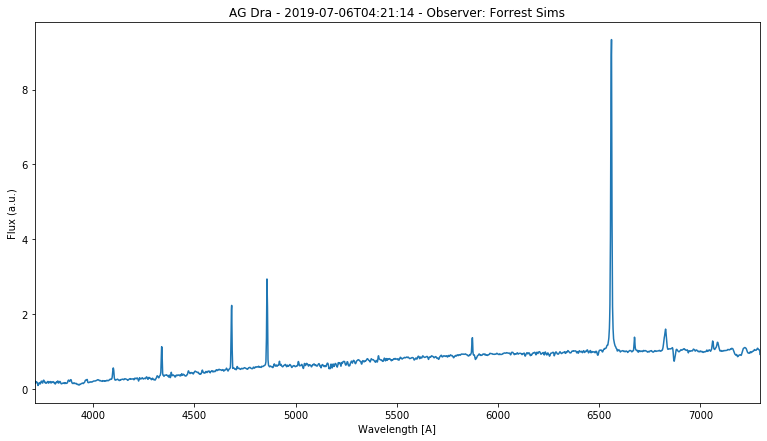

In [6]:
pl.figure(0, figsize=(13,7))
pl.xlabel("Wavelength [A]")
pl.ylabel("Flux (a.u.)")
pl.title("{} - {} - Observer: {}".format(
    data["hdr"]["OBJNAME"], data["date"], data["hdr"]["OBSERVER"]))
pl.xlim(xmin, xmax)
pl.plot(data["w"], data["f"])